In [1]:
from datetime import datetime
import os
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

from scipy import sparse
from scipy.sparse import csc_matrix
from sklearn.decomposition import TruncatedSVD

np.random.seed(0)

### Food.com   Dataset
-  https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews

In [2]:
df = pd.read_csv('Reviews.csv')

df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568438 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
sw_nltk = stopwords.words('english')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\cseka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cseka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cseka\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


## Sentimant analysis on the data
- It will take lot of time

In [7]:
from textblob import TextBlob

In [10]:

def sentiment_analysis(df):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(text):
   return TextBlob(text).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 df['Subjectivity'] =    df['Text'].apply(getSubjectivity)
 df ['Polarity'] =  df['Text'].apply(getPolarity)
 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
 df ['Analysis'] = df ['Polarity'].apply(getAnalysis )
 return df

In [11]:
#sentiment_analysis(df)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Subjectivity,Polarity,Analysis
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.433333,0.450000,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.448571,0.133571,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.533333,0.166667,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.637500,0.483333,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.605000,0.365000,Positive
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.408333,-0.208333,Negative
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0.418750,-0.021875,Negative
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.678571,0.517857,Positive


### Save the result 

In [12]:
#df.to_csv('sentiment_analysis.csv')

In [87]:
df=pd.read_csv('sentiment_analysis.csv')

In [88]:
df

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Subjectivity,Polarity,Analysis
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,0.433333,0.450000,Positive
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333,Negative
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,0.448571,0.133571,Positive
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,0.533333,0.166667,Positive
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0.637500,0.483333,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568449,568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,0.605000,0.365000,Positive
568450,568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,0.408333,-0.208333,Negative
568451,568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...",0.418750,-0.021875,Negative
568452,568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,0.678571,0.517857,Positive


C:\Users\cseka\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Subjectivity ')

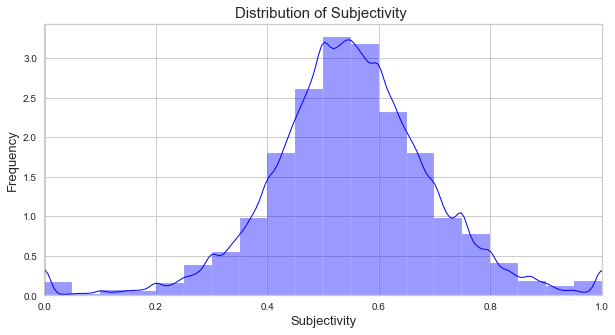

In [89]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['Subjectivity'], hist=True, kde=True,
bins=int(20), color = 'blue',
kde_kws={'linewidth': 1})
plt.xlim([-0.001,1.001])
plt.xlabel('Subjectivity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Subjectivity ', fontsize=15)

C:\Users\cseka\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Polarity ')

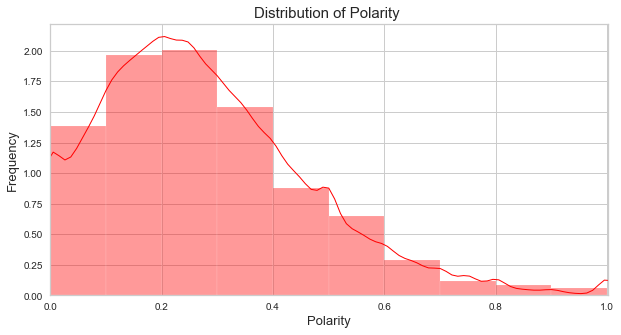

In [90]:
# Density Plot and Histogram of subjectivity
plt.figure(figsize=(10,5))
sns.distplot(df['Polarity'], hist=True, kde=True,
bins=int(20), color = 'red',
kde_kws={'linewidth': 1})
plt.xlim([-0.001,1.001]),
plt.xlabel('Polarity', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.title('Distribution of Polarity ', fontsize=15)

<AxesSubplot:>

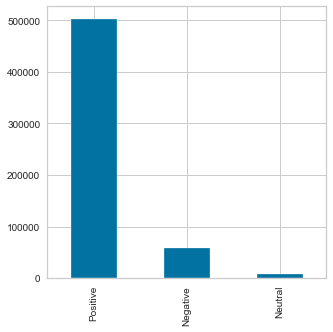

In [91]:
df['Analysis'].value_counts().plot(kind='bar')

In [92]:
df[(df['Analysis']=='Negative') & (df['Score']<=3)]

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Subjectivity,Polarity,Analysis
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0.762963,-0.033333,Negative
50,50,51,B001EO5QW8,A108P30XVUFKXY,Roberto A,0,7,1,1203379200,Don't like it,"This oatmeal is not good. Its mushy, soft, I d...",0.475000,-0.125000,Negative
62,62,63,B001EO5TPM,A1E09XGZUR78C6,gary sturrock,2,2,1,1215302400,stale product.,Arrived in 6 days and were so stale i could no...,0.500000,-0.781250,Negative
67,67,68,B005DUM9UQ,A8OFFIAL6XTOH,Bill Shirer,0,1,2,1338422400,Taste is not so good.,"I purchased the Mango flavor, and to me it doe...",0.623333,-0.032500,Negative
99,99,100,B0019CW0HE,A2P6ACFZ8FTNVV,Melissa Benjamin,0,1,1,1331164800,Bad,I fed this to my Golden Retriever and he hated...,0.713333,-0.353333,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568402,568402,568403,B001EQ5O6Y,A1A3H22VVZYUKW,msfreixy,1,3,1,1187049600,alternative sweetner,"I was disappointed in this product, as I had r...",0.633333,-0.085677,Negative
568413,568413,568414,B0018CLWM4,AI3Y26HLPYW4L,kimosabe,1,2,2,1330041600,premium edge cat food,My cats don't like it. what else can I say to ...,0.455556,-0.055556,Negative
568426,568426,568427,B001FPT1WM,A2F25C6QCKJ3HL,Jill,1,1,1,1341532800,rip off,"The candy is tasty, but they totally scam you ...",0.762500,-0.012500,Negative
568431,568431,568432,B003XUL27E,A32Y0419QFGVHM,Kevin Mitchell,0,0,1,1319673600,Mostly water,Definitely not worth buying flavored water wit...,0.283333,-0.054167,Negative


### Lets drop rows that has bot less rating and negetive sentiment

In [93]:
df[(df['Analysis']=='Negative') & (df['Score']>=4)]

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Subjectivity,Polarity,Analysis
14,14,15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5,1268352000,Strawberry Twizzlers - Yummy,The Strawberry Twizzlers are my guilty pleasur...,1.000000,-0.500000,Negative
52,52,53,B000G6RPMY,A9L6L5H9BPEBO,Edwin C. Pauzer,1,1,4,1348876800,You'll go nuts over Ass-Kickin' Peanuts.,This wasn't in stock the last time I looked. I...,0.595833,-0.125764,Negative
69,69,70,B000E7VI7S,AWCBF2ZWIN57F,C. Salcido,0,2,5,1185753600,pretzel haven!,this was sooooo deliscious but too bad i ate e...,0.633333,-0.225000,Negative
94,94,95,B0019CW0HE,A1DJAAKLPCJRZD,wendy,0,0,5,1329609600,So convenient,This is the same food we get at pet store. But...,0.105556,-0.055556,Negative
98,98,99,B0019CW0HE,ABZ9F0D94YK45,Amazon-tron 3000,0,0,5,1295308800,Perfect for our English Bulldog with Allergies,My English Bulldog had skin allergies the summ...,0.401407,-0.030173,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568420,568420,568421,B004BY23I8,A2B07RJZVDUJA5,P. Mase,0,0,4,1350518400,Co-co-yummy!,Love the coconut flavor of this tea. Two thin...,0.650000,-0.005000,Negative
568424,568424,568425,B001FPT1WM,A291HTT117RVS9,"MadisonVeggie ""Lynette in Wisconsin""",2,2,5,1333411200,"Unusual, even for a violet candy",I've tried several violet flavored candies in ...,0.494792,-0.000521,Negative
568430,568430,568431,B001FPT1WM,A1XDMZMMOAMR7,nyxport,0,0,5,1345161600,delicious,This product is a bit pricey for the amt. rece...,0.400000,-0.100000,Negative
568445,568445,568446,B001EO7N10,A2E5C8TTAED4CQ,S. Linkletter,2,2,5,1268006400,Five Spice Powder,"You can make this mix yourself, but the Star A...",0.501667,-0.099271,Negative


### Look at distribution of ratings

<AxesSubplot:xlabel='Score'>

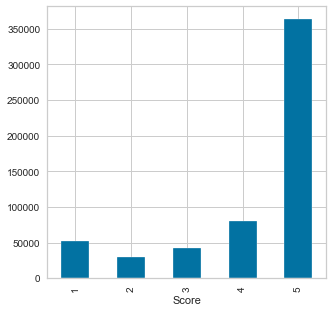

In [94]:
df.groupby(['Score']).size().plot(kind = "bar")

### Data based on sentiments

<AxesSubplot:xlabel='Analysis'>

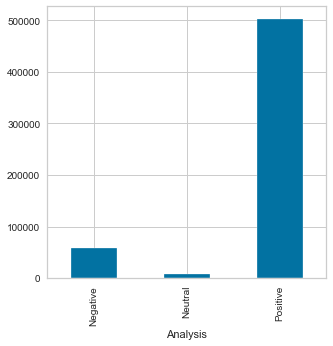

In [95]:
df.groupby(['Analysis']).count()['Score'].plot(kind = "bar")

In [96]:
pos=df[df['Analysis']=='Positive']['ProductId'].value_counts().reset_index(name='Positive')

In [97]:
neg=df[df['Analysis']=='Negative']['ProductId'].value_counts().reset_index(name='Negetive')

In [98]:
neu=df[df['Analysis']=='Neutral']['ProductId'].value_counts().reset_index(name='Neutral')

In [99]:
mean=df.groupby( ['ProductId']).mean()


In [100]:
unique_ids=pd.DataFrame({'ProductId':df.ProductId.unique()})
unique_ids

,ProductId
0,B001E4KFG0
1,B00813GRG4
2,B000LQOCH0
3,B000UA0QIQ
4,B006K2ZZ7K
...,...
74253,B000H7K114
74254,B001EO7N10
74255,B003S1WTCU
74256,B004I613EE


In [101]:
pd.set_option("display.max_columns", 100)
unique_ids=unique_ids.merge(neu, left_on='ProductId', right_on='index', how='left').fillna(0)
unique_ids=unique_ids.merge(neg, left_on='ProductId', right_on='index', how='left').fillna(0)
unique_ids=unique_ids.merge(pos, left_on='ProductId', right_on='index', how='left').fillna(0)
unique_ids=unique_ids.merge(mean, left_on='ProductId', right_on='ProductId', how='left').fillna(0)

unique_ids.head(1)

,ProductId,index_x,Neutral,index_y,Negetive,index,Positive,Unnamed: 0,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Subjectivity,Polarity
0,B001E4KFG0,0,0.0,0,0.0,B001E4KFG0,1.0,0.0,1.0,1.0,1.0,5.0,1.303862e+09,0.433333,0.45


In [102]:
unique_ids=unique_ids[['ProductId','Neutral','Positive','Negetive','Score']]


In [103]:
df=df .merge(unique_ids, left_on='ProductId', right_on='ProductId', how='inner').fillna(0)
df=df[['ProductId','Analysis','Positive','Negetive','Neutral','Score_x']]

In [104]:
df

,ProductId,Analysis,Positive,Negetive,Neutral,Score_x
0,B001E4KFG0,Positive,1.0,0.0,0.0,5
1,B00813GRG4,Negative,0.0,1.0,0.0,1
2,B000LQOCH0,Positive,1.0,0.0,0.0,4
3,B000UA0QIQ,Positive,1.0,0.0,0.0,2
4,B006K2ZZ7K,Positive,4.0,0.0,0.0,5
...,...,...,...,...,...,...
568449,B001EO7N10,Positive,5.0,1.0,0.0,5
568450,B003S1WTCU,Negative,0.0,1.0,0.0,2
568451,B004I613EE,Negative,1.0,1.0,0.0,5
568452,B004I613EE,Positive,1.0,1.0,0.0,5


In [105]:
df=df.rename(columns = {'Score_x':'Score'})


#### Correlation of ratings with Sentiments

In [106]:
df=df.drop_duplicates(subset=['ProductId'])

In [107]:
df

,ProductId,Analysis,Positive,Negetive,Neutral,Score
0,B001E4KFG0,Positive,1.0,0.0,0.0,5
1,B00813GRG4,Negative,0.0,1.0,0.0,1
2,B000LQOCH0,Positive,1.0,0.0,0.0,4
3,B000UA0QIQ,Positive,1.0,0.0,0.0,2
4,B006K2ZZ7K,Positive,4.0,0.0,0.0,5
...,...,...,...,...,...,...
568443,B000H7K114,Positive,1.0,0.0,0.0,5
568444,B001EO7N10,Positive,5.0,1.0,0.0,5
568450,B003S1WTCU,Negative,0.0,1.0,0.0,2
568451,B004I613EE,Negative,1.0,1.0,0.0,5


### Popularity Based Recommendation 

In [108]:
top_result=df.sort_values(by=['Positive','Score'], ascending=[False,False]).head(10)

In [109]:
top_result=top_result.merge(df, left_on='ProductId', right_on='ProductId', how='left').fillna(0)

In [112]:
top_result =top_result.rename(columns = {'Positive_x':'Positive'})
top_result =top_result.rename(columns = {'Analysis_x':'Analysis'})
top_result =top_result.rename(columns = {'Score_x':'Score'})
top_result =top_result.rename(columns = {'Negetive_x':'Negetive'})
top_result =top_result.rename(columns = {'Neutral_y':'Neutral'})

In [113]:
top_result[['ProductId','Positive','Negetive','Neutral','Score']]

,ProductId,Positive,Negetive,Neutral,Score
0,B007JFMH8M,902.0,9.0,2.0,5
1,B003B3OOPA,583.0,26.0,14.0,5
2,B001EO5Q64,538.0,25.0,4.0,5
3,B002QWP89S,535.0,74.0,23.0,5
4,B0026RQTGE,535.0,74.0,23.0,5
5,B002QWHJOU,535.0,74.0,23.0,5
6,B002QWP8H0,535.0,74.0,23.0,5
7,B000NMJWZO,530.0,9.0,3.0,5
8,B0013NUGDE,520.0,41.0,3.0,5
9,B007M83302,520.0,41.0,3.0,5


### Collaborative filtering


- Since we have enough data for user item interaction we can perform collaborative filtering

In [114]:
food_df = pd.read_csv('Reviews.csv')

food_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [117]:
ratings_mat = np.ndarray(
    shape=(np.max(food_df.ProductId.values), np.max(food_df.UserId.values)),
    dtype=np.uint8)
ratings_mat[food_df.ProductId.values-1, food_df.UserId.values-1] = food_df.Score.values

TypeError: 'str' object cannot be interpreted as an integer